<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

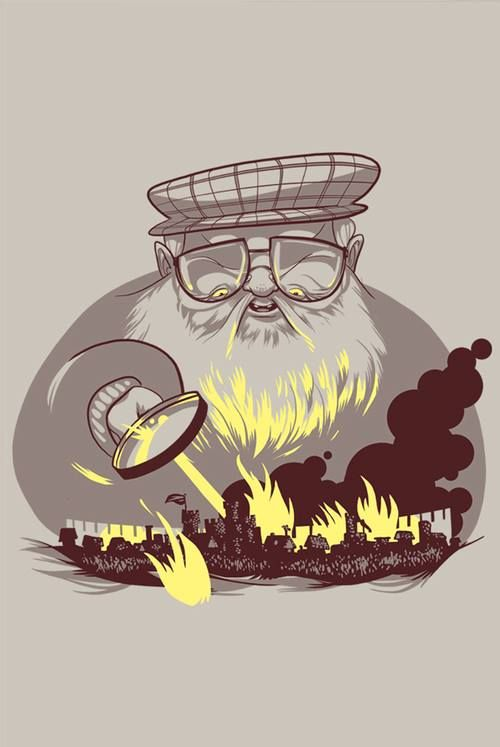

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 70.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 88.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')

In [4]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [5]:
from prettytable import PrettyTable

table = PrettyTable(field_names=['Столбец', 'Кол-во пропусков', '% пропусков'])
data_cnt = data.count().max()

for column in data.columns:
  nan_cnt = data[column].isna().sum()
  nan_percent = round(nan_cnt / data_cnt * 100, 2)

  row = [column, nan_cnt, f'{nan_percent} %']
  table.add_row(row)

table.sortby = 'Кол-во пропусков'
table.reversesort=True

print(table)

+------------------+------------------+-------------+
|     Столбец      | Кол-во пропусков | % пропусков |
+------------------+------------------+-------------+
|      mother      |       1539       |   98.84 %   |
|  isAliveMother   |       1539       |   98.84 %   |
|   isAliveHeir    |       1536       |   98.65 %   |
|       heir       |       1536       |   98.65 %   |
|  isAliveFather   |       1535       |   98.59 %   |
|      father      |       1535       |   98.59 %   |
|      spouse      |       1357       |   87.15 %   |
|  isAliveSpouse   |       1357       |   87.15 %   |
|   dateOfBirth    |       1278       |   82.08 %   |
|       age        |       1278       |   82.08 %   |
|     culture      |       1069       |   68.66 %   |
|      title       |       840        |   53.95 %   |
|      house       |       381        |   24.47 %   |
|    popularity    |        0         |    0.0 %    |
| numDeadRelations |        0         |    0.0 %    |
|       name       |        

Видно, что многие во многих столбцах слишком много NaN значений, удалим их. Также удалим столбец name, так как он не может оказывать влияние на целевую переменную

In [6]:
data.drop(columns=["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "spouse", "heir", "father", "mother", "title", "dateOfBirth", "age", "name"], inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [7]:
data['isPopular'] = [round(i) for i in data.popularity]

data['boolDeadRelations'] = [1 if i > 0 else 0 for i in data.numDeadRelations > 0]

In [8]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

data["culture"] = data["culture"].str.lower()
for key, value in cult.items():
  for j in value:
    data['culture'] = data['culture'].replace(j, key)

data["culture"] = data["culture"].replace([None], "other")
data["house"] = data["house"].replace([None], "other")

Создал два новых признака и упростил признак culture, но так как там осталось довольно много NaN значений, пока заменил их на other

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [9]:
data.drop(columns=['popularity', 'numDeadRelations'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [10]:
((data["isAlive"] == 0).sum(), (data["isAlive"] == 1).sum())

(345, 1212)

Можно сделать вывод о том, что датасет не сбалансирован

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

<Axes: >

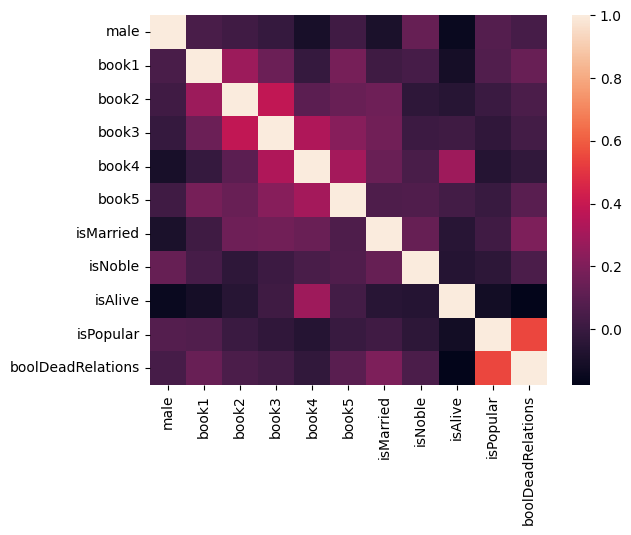

In [11]:
cat_col = data.select_dtypes(include=['object']).columns.tolist()
sns.heatmap(data.drop(cat_col, axis=1).corr())

In [12]:
data = pd.get_dummies(data, drop_first=True)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [13]:
X = data.drop(["isAlive"], axis=1)
y = data.isAlive

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [16]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [17]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [18]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [19]:
models = [AdaBoostClassifier(), RandomForestClassifier(n_estimators=10), GaussianProcessClassifier(), GaussianNB(), SVC(), DecisionTreeClassifier()]

models_preds = []

for model in models:
  model.fit(X_train, y_train)
  models_preds.append(model.predict(X_test))
  print(f'Модель {model} обучилась')


Модель AdaBoostClassifier() обучилась
Модель RandomForestClassifier(n_estimators=10) обучилась
Модель GaussianProcessClassifier() обучилась
Модель GaussianNB() обучилась
Модель SVC() обучилась
Модель DecisionTreeClassifier() обучилась


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [20]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [21]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8058


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [22]:
models_res = model_tabel = PrettyTable(field_names=["Название модели", "Метрика accuracy"])

for i, model in enumerate(models):
  model_name = str(model).replace("()", "")
  acc = accuracy_score(y_test, models_preds[i])
  models_res.add_row([model_name, round(acc, 2)])

models_res.sortby = "Метрика accuracy"
models_res.reversesort=True

print(models_res)

+-----------------------------------------+------------------+
|             Название модели             | Метрика accuracy |
+-----------------------------------------+------------------+
|                   SVC                   |       0.83       |
|        GaussianProcessClassifier        |       0.83       |
|            AdaBoostClassifier           |       0.82       |
| RandomForestClassifier(n_estimators=10) |       0.78       |
|          DecisionTreeClassifier         |       0.75       |
|                GaussianNB               |       0.33       |
+-----------------------------------------+------------------+


Как можно видеть, лучший результат показал SVC, поэтому буду использовать его

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [23]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 15.8MB/s]


In [24]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [25]:
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

data_test.drop(columns=["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "spouse", "heir", "father", "mother", "title", "dateOfBirth", "age", "name"], inplace=True)

data_test['isPopular'] = [round(i) for i in data_test.popularity]

data_test['boolDeadRelations'] = [1 if i > 0 else 0 for i in data_test.numDeadRelations > 0]

data_test["culture"] = data_test["culture"].str.lower()
for key, value in cult.items():
  for j in value:
    data_test['culture'] = data_test['culture'].replace(j, key)

data_test["culture"] = data_test["culture"].replace([None], "other")
data_test["house"] = data_test["house"].replace([None], "other")

data_test.drop(columns=['popularity', 'numDeadRelations'], inplace = True)

data_test = pd.get_dummies(data_test, drop_first=True)

# Так как набор столцов у нас разный в data и в data_test, то добавим в data_test недостающие столбцы
required_columns = data.columns

missing_columns = [col for col in required_columns if col not in data_test.columns]
missing_data = pd.DataFrame(0, index=data_test.index, columns=missing_columns)

data_test = pd.concat([data_test, missing_data], axis=1)

data_test = data_test[required_columns]
data_test.drop(columns=["isAlive"], inplace=True)

In [26]:
y = data_test.values
y_pred1 = models[-2].predict(y)

submission['isAlive'] = [i for i in y_pred1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Как сохранить измененный Pandas DataFrame в csv файл:

In [27]:
submission.to_csv("/content/new_submission.csv", index=False)